In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
pip install scikit-learn-extra

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/EM:IP/정리/최종 데이터 파일/variables/3_Outliers_3_FullC_7.0.csv', index_col = False)
df

,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_solving,time_total,time_answer,time_not_answer,avg_time_btw_events,length,events_num,credit,OECD,cnt_code
0,ARE000018804820,ARE,45.4,10.5,0.0,10.5,40.8,8.6,58.8,108.2,55.9,2.9,5.880000,2,10,1,0,1
1,ARE000039910042,ARE,10.9,4.3,26.2,30.5,20.8,3.2,70.3,94.3,41.4,28.9,1.634884,5,43,1,0,1
2,ARE000006001557,ARE,23.9,3.8,30.5,34.3,9.3,3.3,88.1,100.7,58.2,29.9,3.524000,4,25,1,0,1
3,ARE000024506213,ARE,4.7,4.3,22.5,26.8,7.6,5.7,38.6,51.9,31.5,7.1,2.144444,4,18,1,0,1
4,ARE000006601699,ARE,27.6,11.8,0.0,11.8,19.2,2.2,52.9,74.3,39.4,13.5,4.069231,2,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,USA000015004612,USA,8.1,8.3,0.0,8.3,15.7,4.6,18.0,38.3,16.4,1.6,2.250000,2,8,1,1,42
7088,USA000015004637,USA,25.8,11.5,0.0,11.5,19.8,2.5,41.7,64.0,37.3,4.4,4.170000,2,10,1,1,42
7089,USA000007902358,USA,35.9,12.9,0.0,12.9,24.7,6.4,50.2,81.3,48.8,1.4,6.275000,2,8,1,1,42
7090,USA000007902371,USA,33.3,15.8,0.0,15.8,11.9,12.5,50.0,74.4,49.1,0.9,4.545455,2,11,1,1,42


In [9]:
df['cnt'] = df['cnt'].astype(str)
df['OECD'] = df['OECD'].astype(int)
df['credit'] = df['credit'].astype(int)
df['length'] = df['length'].astype(int)
df['time_start'] = df['time_start'].astype(float)
df['time_end'] = df['time_end'].astype(float)
df['time_solving'] = df['time_solving'].astype(float)
df['time_total'] = df['time_total'].astype(float)
df['time_answer'] = df['time_answer'].astype(float)
df['time_not_answer'] = df['time_not_answer'].astype(float)
df['avg_time_btw_events'] = df['avg_time_btw_events'].astype(float)
df.set_index('ID', inplace=True)
df

,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_solving,time_total,time_answer,time_not_answer,avg_time_btw_events,length,events_num,credit,OECD,cnt_code
ID,,,,,,,,,,,,,,,,,
ARE000018804820,ARE,45.4,10.5,0.0,10.5,40.8,8.6,58.8,108.2,55.9,2.9,5.880000,2,10,1,0,1
ARE000039910042,ARE,10.9,4.3,26.2,30.5,20.8,3.2,70.3,94.3,41.4,28.9,1.634884,5,43,1,0,1
ARE000006001557,ARE,23.9,3.8,30.5,34.3,9.3,3.3,88.1,100.7,58.2,29.9,3.524000,4,25,1,0,1
ARE000024506213,ARE,4.7,4.3,22.5,26.8,7.6,5.7,38.6,51.9,31.5,7.1,2.144444,4,18,1,0,1
ARE000006601699,ARE,27.6,11.8,0.0,11.8,19.2,2.2,52.9,74.3,39.4,13.5,4.069231,2,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA000015004612,USA,8.1,8.3,0.0,8.3,15.7,4.6,18.0,38.3,16.4,1.6,2.250000,2,8,1,1,42
USA000015004637,USA,25.8,11.5,0.0,11.5,19.8,2.5,41.7,64.0,37.3,4.4,4.170000,2,10,1,1,42
USA000007902358,USA,35.9,12.9,0.0,12.9,24.7,6.4,50.2,81.3,48.8,1.4,6.275000,2,8,1,1,42


### 7.0 데이터로 정답자 이상치 확인 및 시간 자연로그처리

In [10]:
index = df[df['time_not_answer']<0].index

In [11]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


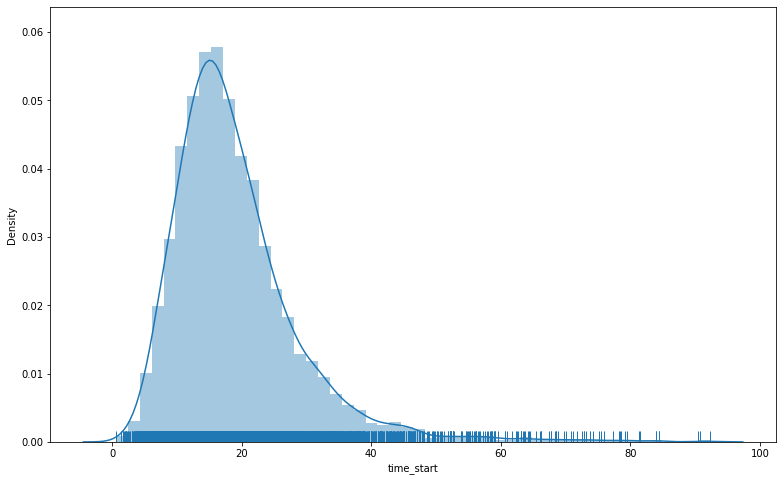

In [12]:
sns.distplot(df['time_start'], rug=True)
plt.show()

In [13]:
print(np.min(df['time_start']))
print(np.min(df['avg_time_btw_events']))
print(np.min(df['time_not_answer']))
print(np.min(df['length']))

0.6
0.822222222
0.0
2


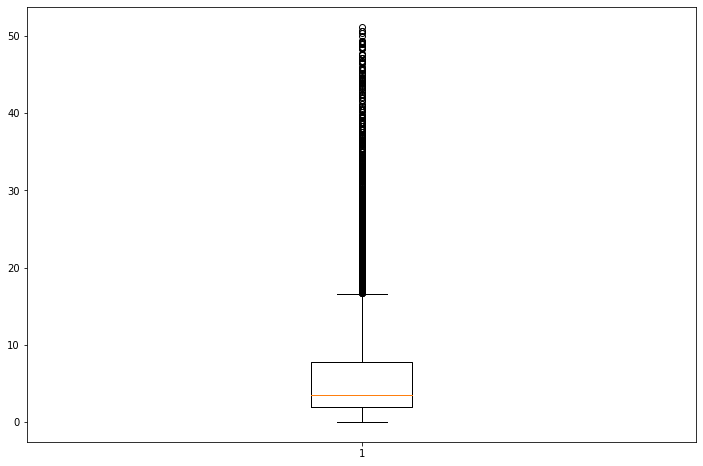

In [14]:
# 정답자 time_not_answer 박스플롯
plt.figure(figsize=(12, 8))
plt.boxplot(df['time_not_answer'])
plt.show()

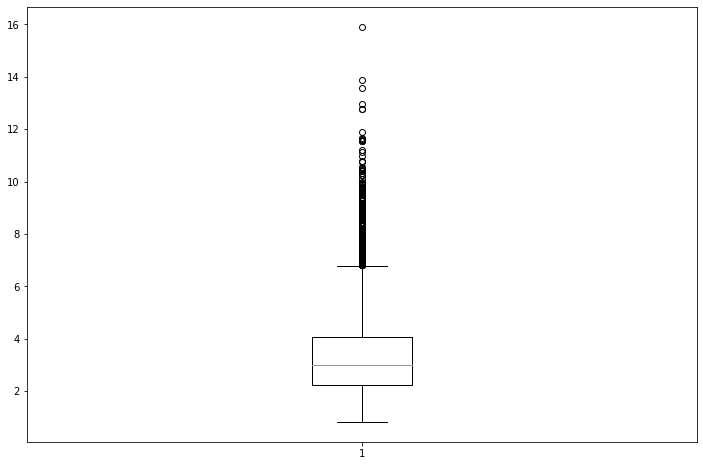

In [15]:
# 정답자 avg_time_btw_events 박스플롯
plt.figure(figsize=(12, 8))
plt.boxplot(df['avg_time_btw_events'])
plt.show()

In [16]:
df

,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_solving,time_total,time_answer,time_not_answer,avg_time_btw_events,length,events_num,credit,OECD,cnt_code
ID,,,,,,,,,,,,,,,,,
ARE000018804820,ARE,45.4,10.5,0.0,10.5,40.8,8.6,58.8,108.2,55.9,2.9,5.880000,2,10,1,0,1
ARE000039910042,ARE,10.9,4.3,26.2,30.5,20.8,3.2,70.3,94.3,41.4,28.9,1.634884,5,43,1,0,1
ARE000006001557,ARE,23.9,3.8,30.5,34.3,9.3,3.3,88.1,100.7,58.2,29.9,3.524000,4,25,1,0,1
ARE000024506213,ARE,4.7,4.3,22.5,26.8,7.6,5.7,38.6,51.9,31.5,7.1,2.144444,4,18,1,0,1
ARE000006601699,ARE,27.6,11.8,0.0,11.8,19.2,2.2,52.9,74.3,39.4,13.5,4.069231,2,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA000015004612,USA,8.1,8.3,0.0,8.3,15.7,4.6,18.0,38.3,16.4,1.6,2.250000,2,8,1,1,42
USA000015004637,USA,25.8,11.5,0.0,11.5,19.8,2.5,41.7,64.0,37.3,4.4,4.170000,2,10,1,1,42
USA000007902358,USA,35.9,12.9,0.0,12.9,24.7,6.4,50.2,81.3,48.8,1.4,6.275000,2,8,1,1,42


In [17]:
from numpy import log as ln
from math import e
ln = np.log
df['time_A_total'] = ln(df['time_A_total']+1)
df['time_b1'] = ln(df['time_b1']+1)
df['time_b2'] = ln(df['time_b2']+1)
df['time_B_total'] = ln(df['time_B_total']+1)
df['time_start'] = ln(df['time_start']+1)
df['time_end'] = ln(df['time_end']+1)
df['time_solving'] = ln(df['time_solving']+1)
df['time_total'] = ln(df['time_total']+1)
df['time_answer'] = ln(df['time_answer']+1)
df['time_not_answer'] = ln(df['time_not_answer']+1)
df['avg_time_btw_events'] = ln(df['avg_time_btw_events']+1)

In [18]:
df

,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_solving,time_total,time_answer,time_not_answer,avg_time_btw_events,length,events_num,credit,OECD,cnt_code
ID,,,,,,,,,,,,,,,,,
ARE000018804820,ARE,3.837299,2.442347,0.000000,2.442347,3.732896,2.261763,4.091006,4.693181,4.041295,1.360977,1.928619,2,10,1,0,1
ARE000039910042,ARE,2.476538,1.667707,3.303217,3.449988,3.081910,1.435085,4.266896,4.557030,3.747148,3.397858,0.968839,5,43,1,0,1
ARE000006001557,ARE,3.214868,1.568616,3.449988,3.563883,2.332144,1.458615,4.489759,4.622027,4.080922,3.430756,1.509397,4,25,1,0,1
ARE000024506213,ARE,1.740466,1.667707,3.157000,3.325036,2.151762,1.902108,3.678829,3.968403,3.481240,2.091864,1.145637,4,18,1,0,1
ARE000006601699,ARE,3.353407,2.549445,0.000000,2.549445,3.005683,1.163151,3.987130,4.321480,3.698830,2.674149,1.623189,2,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA000015004612,USA,2.208274,2.230014,0.000000,2.230014,2.815409,1.722767,2.944439,3.671225,2.856470,0.955511,1.178655,2,8,1,1,42
USA000015004637,USA,3.288402,2.525729,0.000000,2.525729,3.034953,1.252763,3.754199,4.174387,3.645450,1.686399,1.642873,2,10,1,1,42
USA000007902358,USA,3.608212,2.631889,0.000000,2.631889,3.246491,2.001480,3.935740,4.410371,3.908015,0.875469,1.984444,2,8,1,1,42


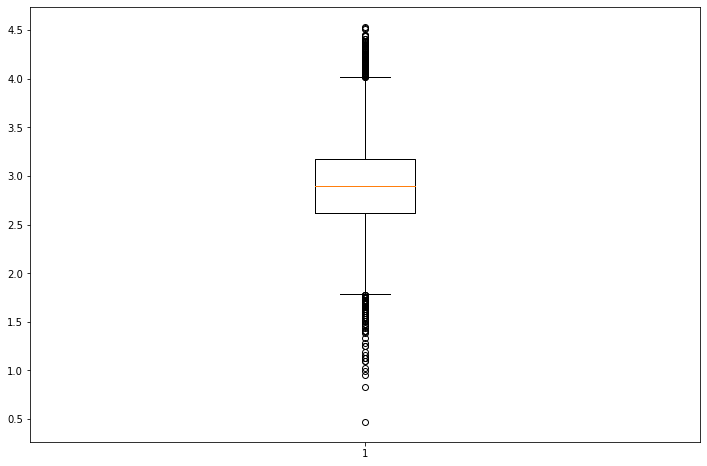

In [19]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['time_start'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


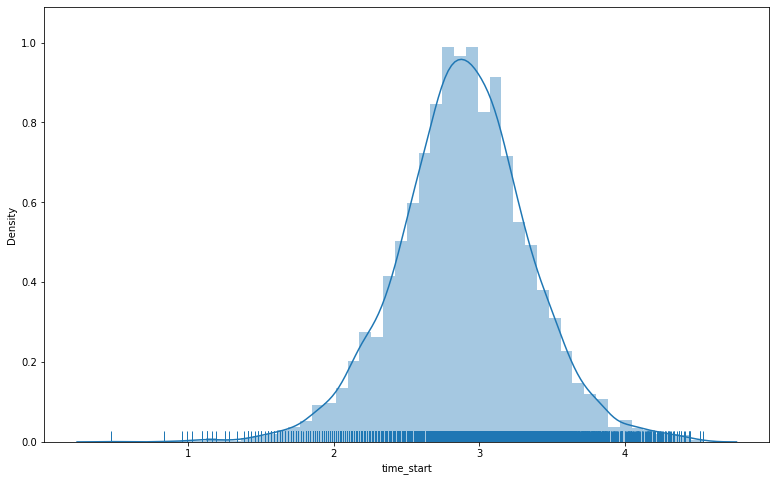

In [20]:
sns.distplot(df['time_start'], rug=True)
plt.show()

In [21]:
df.to_csv('3_OutliersNormalization_3_FullC_7.0).csv', index = True)